In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

In [52]:
data_dir = '/Users/zstanley/Documents/git_repos/obs_loc_for_scda/my_data/20151206.030000'
plot_dir = '/Users/zstanley/Documents/git_repos/obs_loc_for_scda/plots/power_analysis/'

In [78]:
yale_blue          = [8/256, 75/256, 131/256]
green_blue_crayola = [39/256, 130/256, 205/256]
maximum_blue       = [66/256, 191/256, 221/256]

In [4]:
rng = np.random.default_rng(1313)

In [5]:
def compute_sample_correlation(num_samples, true_corr):
    
    # The desired mean values of the sample.
    mu = np.array([0.0, 0.0])
    
    # The desired covariance matrix.
    r = np.array([
        [ 1.0, true_corr],
        [ true_corr,  1],
    ])
    y = rng.multivariate_normal(mu, r, size=num_samples)
    sample_corr = np.corrcoef(y, rowvar=False)[0,1]
    
    return sample_corr

In [6]:
def compute_frac_samp_corr_in_range(num_samples, true_corr, num_monte_carlo=10000, ranger=0.1):
    sample_corr = np.array([None]*num_monte_carlo)
    for trial in range(num_monte_carlo):
        sample_corr[trial] = compute_sample_correlation(num_samples, true_corr)
    
    frac_in_range = np.sum(np.abs(sample_corr - true_corr) < ranger ) / num_monte_carlo
    
    return frac_in_range

In [7]:
list_num_samples = np.arange(10, 250, 10)
true_corr = 0.3

In [8]:
frac_in_range_010 = np.zeros(list_num_samples.shape)
frac_in_range_020 = frac_in_range_010.copy()
frac_in_range_030 = frac_in_range_010.copy()
frac_in_range_040 = frac_in_range_010.copy()
frac_in_range_050 = frac_in_range_010.copy()
frac_in_range_060 = frac_in_range_010.copy()
frac_in_range_070 = frac_in_range_010.copy()
frac_in_range_080 = frac_in_range_010.copy()
frac_in_range_090 = frac_in_range_010.copy()

In [62]:
for ind in range(len(list_num_samples)):
    print(list_num_samples[ind])
    #frac_in_range_010[ind] = compute_frac_samp_corr_in_range(list_num_samples[ind], true_corr=0.10)
    #frac_in_range_020[ind] = compute_frac_samp_corr_in_range(list_num_samples[ind], true_corr=0.20)
    #frac_in_range_030[ind] = compute_frac_samp_corr_in_range(list_num_samples[ind], true_corr=0.30)
    #frac_in_range_040[ind] = compute_frac_samp_corr_in_range(list_num_samples[ind], true_corr=0.40)
    #frac_in_range_050[ind] = compute_frac_samp_corr_in_range(list_num_samples[ind], true_corr=0.50)
    #frac_in_range_060[ind] = compute_frac_samp_corr_in_range(list_num_samples[ind], true_corr=0.60)
    #frac_in_range_070[ind] = compute_frac_samp_corr_in_range(list_num_samples[ind], true_corr=0.70)
    #frac_in_range_080[ind] = compute_frac_samp_corr_in_range(list_num_samples[ind], true_corr=0.80)
    frac_in_range_090[ind] = compute_frac_samp_corr_in_range(list_num_samples[ind], true_corr=0.90)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240


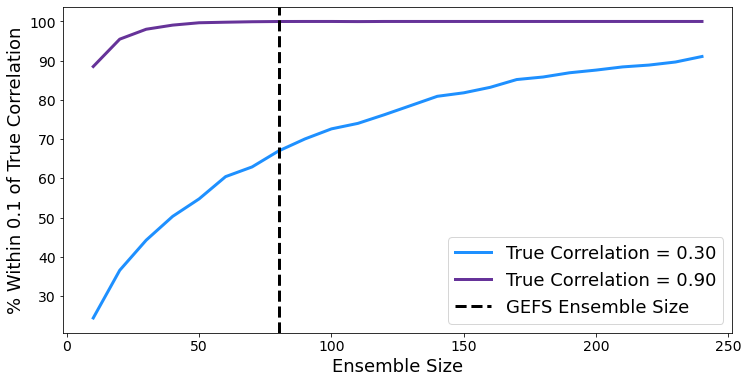

In [85]:
plt.plot(list_num_samples, 100*frac_in_range_030, label='True Correlation = 0.30', linewidth=3, color='dodgerblue')
plt.plot(list_num_samples, 100*frac_in_range_090, label='True Correlation = 0.90', linewidth=3, color='rebeccapurple')

plt.axvline(80, color='k', linestyle='--', linewidth=3, label = 'GEFS Ensemble Size')


plt.ylabel('% Within 0.1 of True Correlation', fontsize=18)
plt.xlabel('Ensemble Size', fontsize=18)
plt.legend(fontsize=18)

# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.rcParams['figure.figsize'] = [12,6]

plt.savefig(plot_dir+'sample_correlation_accuracy_vs_ens_size.pdf')
plt.show()

In [ ]:
def compute_ens_size_by_cutoff_frac(frac_in_range, list_num_samples, cutoff):
    ind = next((x for x in range(len(frac_in_range)) if frac_in_range[x] > cutoff), None)
    if ind == 0:
        return list_num_samples[0]
    elif ind == None:
        return None
    else:
        y1 = list_num_samples[ind]
        y0 = list_num_samples[ind-1]
        x1 = frac_in_range[ind]
        x0 = frac_in_range[ind-1]
        m = (y1-y0)/(x1-x0)
        y = (cutoff - x0)*m + y0
        return y

In [ ]:
compute_ens_size_by_cutoff_frac(frac_in_range_090, list_num_samples, 0.8)

In [ ]:
list_corr = np.arange(0.10, 1.0, 0.1)
list_ens_size_needed_80 = np.zeros_like(list_corr)
list_ens_size_needed_90 = np.zeros_like(list_corr)
list_ens_size_needed_70 = np.zeros_like(list_corr)

In [ ]:
list_ens_size_needed_80[0] = compute_ens_size_by_cutoff_frac(frac_in_range_010, list_num_samples, 0.8)
list_ens_size_needed_80[1] = compute_ens_size_by_cutoff_frac(frac_in_range_020, list_num_samples, 0.8)
list_ens_size_needed_80[2] = compute_ens_size_by_cutoff_frac(frac_in_range_030, list_num_samples, 0.8)
list_ens_size_needed_80[3] = compute_ens_size_by_cutoff_frac(frac_in_range_040, list_num_samples, 0.8)
list_ens_size_needed_80[4] = compute_ens_size_by_cutoff_frac(frac_in_range_050, list_num_samples, 0.8)
list_ens_size_needed_80[5] = compute_ens_size_by_cutoff_frac(frac_in_range_060, list_num_samples, 0.8)
list_ens_size_needed_80[6] = compute_ens_size_by_cutoff_frac(frac_in_range_070, list_num_samples, 0.8)
list_ens_size_needed_80[7] = compute_ens_size_by_cutoff_frac(frac_in_range_080, list_num_samples, 0.8)
list_ens_size_needed_80[8] = compute_ens_size_by_cutoff_frac(frac_in_range_090, list_num_samples, 0.8)

In [ ]:
list_ens_size_needed_90[0] = compute_ens_size_by_cutoff_frac(frac_in_range_010, list_num_samples, 0.9)
list_ens_size_needed_90[1] = compute_ens_size_by_cutoff_frac(frac_in_range_020, list_num_samples, 0.9)
list_ens_size_needed_90[2] = compute_ens_size_by_cutoff_frac(frac_in_range_030, list_num_samples, 0.9)
list_ens_size_needed_90[3] = compute_ens_size_by_cutoff_frac(frac_in_range_040, list_num_samples, 0.9)
list_ens_size_needed_90[4] = compute_ens_size_by_cutoff_frac(frac_in_range_050, list_num_samples, 0.9)
list_ens_size_needed_90[5] = compute_ens_size_by_cutoff_frac(frac_in_range_060, list_num_samples, 0.9)
list_ens_size_needed_90[6] = compute_ens_size_by_cutoff_frac(frac_in_range_070, list_num_samples, 0.9)
list_ens_size_needed_90[7] = compute_ens_size_by_cutoff_frac(frac_in_range_080, list_num_samples, 0.9)
list_ens_size_needed_90[8] = compute_ens_size_by_cutoff_frac(frac_in_range_090, list_num_samples, 0.9)

In [ ]:
list_ens_size_needed_70[0] = compute_ens_size_by_cutoff_frac(frac_in_range_010, list_num_samples, 0.7)
list_ens_size_needed_70[1] = compute_ens_size_by_cutoff_frac(frac_in_range_020, list_num_samples, 0.7)
list_ens_size_needed_70[2] = compute_ens_size_by_cutoff_frac(frac_in_range_030, list_num_samples, 0.7)
list_ens_size_needed_70[3] = compute_ens_size_by_cutoff_frac(frac_in_range_040, list_num_samples, 0.7)
list_ens_size_needed_70[4] = compute_ens_size_by_cutoff_frac(frac_in_range_050, list_num_samples, 0.7)
list_ens_size_needed_70[5] = compute_ens_size_by_cutoff_frac(frac_in_range_060, list_num_samples, 0.7)
list_ens_size_needed_70[6] = compute_ens_size_by_cutoff_frac(frac_in_range_070, list_num_samples, 0.7)
list_ens_size_needed_70[7] = compute_ens_size_by_cutoff_frac(frac_in_range_080, list_num_samples, 0.7)
list_ens_size_needed_70[8] = compute_ens_size_by_cutoff_frac(frac_in_range_090, list_num_samples, 0.7)

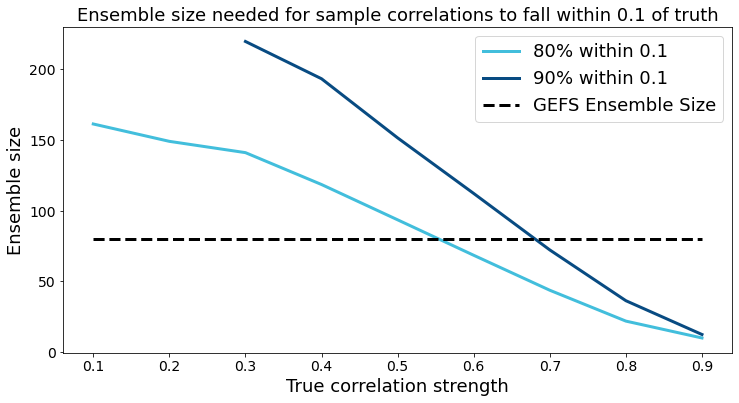

In [365]:
fig, ax = plt.subplots()

#ax.plot(list_corr, list_ens_size_needed_70, label = '70% within 0.1', color=maximum_blue,       linewidth=3)
ax.plot(list_corr, list_ens_size_needed_80, label = '80% within 0.1', color=maximum_blue, linewidth=3)
ax.plot(list_corr, list_ens_size_needed_90, label = '90% within 0.1', color=yale_blue,          linewidth=3)
ax.hlines(80, 0.1, 0.9, colors='k', linestyles='--', linewidth=3, label = 'GEFS Ensemble Size')

ax.legend(fontsize=18)
ax.set_ylabel('Ensemble size', fontsize=18)
ax.set_xlabel('True correlation strength', fontsize=18)
ax.set_title('Ensemble size needed for sample correlations to fall within 0.1 of truth', fontsize=18)

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
plt.rcParams['figure.figsize'] = [12,6]
#fig.savefig('Desktop/ens_size_v_true_correlation.png')

## Load averaged correlations

In [10]:
ds = xr.open_dataset(data_dir+'/temperature_correlations_averaged.nc')

In [11]:
ds

<xarray.Dataset>
Dimensions:       (lon: 360, lat: 180, atm_lev: 74, atm_lev_copy: 74, ocn_lev: 44, ocn_lev_copy: 44)
Coordinates:
  * lon           (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat           (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * atm_lev       (atm_lev) float32 53.0 54.0 55.0 56.0 ... 124.0 125.0 126.0
  * atm_lev_copy  (atm_lev_copy) float32 53.0 54.0 55.0 ... 124.0 125.0 126.0
  * ocn_lev       (ocn_lev) float32 1.0 3.0 5.0 7.0 ... 313.8 356.5 405.6 461.6
  * ocn_lev_copy  (ocn_lev_copy) float32 1.0 3.0 5.0 7.0 ... 356.5 405.6 461.6
Data variables:
    corr_atm_atm  (atm_lev, lat, lon, atm_lev_copy) float32 ...
    corr_atm_ocn  (atm_lev, lat, lon, ocn_lev) float32 ...
    corr_ocn_ocn  (ocn_lev, lat, lon, ocn_lev_copy) float32 ...
    atm_p         (atm_lev, lat, lon) float32 ...
    ocn_z         (ocn_lev, lat, lon) float32 ...

In [12]:
# pressure at one localization radius above surface
target_atm_p = ds['atm_p'].sel(atm_lev=126)/np.exp(0.2)

In [13]:
ds['atm_p'].sel(atm_lev = 94).median()

<xarray.DataArray 'atm_p' ()>
array(798.56408691)
Coordinates:
    atm_lev  float32 94.0

In [14]:
corr_atmbl = ds['corr_atm_atm'].sel(atm_lev = slice(94, 125, 1), atm_lev_copy = 126)
corr_atm = corr_atmbl.values.ravel()

In [15]:
prc90_atm = np.nanpercentile(corr_atm, 90)

In [16]:
corr_ast_sst = ds['corr_atm_ocn'].sel(atm_lev = 126, ocn_lev =1)
corr_surf = corr_ast_sst.values.ravel()

In [17]:
prc90_surf = np.nanpercentile(corr_surf, 90)

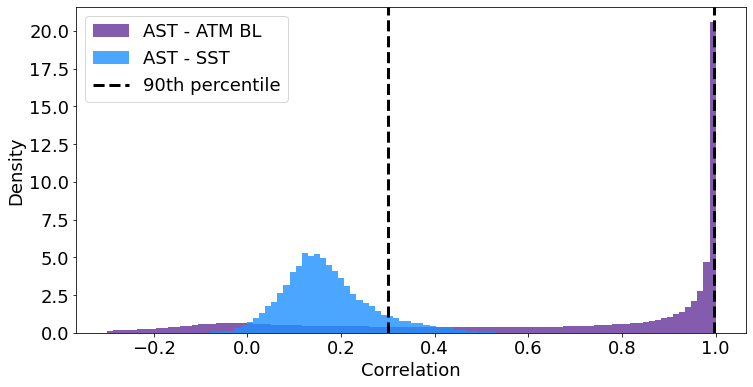

In [73]:
plt.hist(corr_atm, density=True, stacked=True, range=(-0.3, 1.0), bins=100, color='rebeccapurple', alpha=0.8, label='AST - ATM BL')
plt.hist(corr_surf, density=True, stacked=True, range=(-0.3, 1.0), bins=100, color='dodgerblue', alpha=0.8, label='AST - SST')

plt.axvline(prc90_atm, color='k', linestyle='--', linewidth=3, label = '90th percentile')
plt.axvline(prc90_surf, color='k', linestyle='--', linewidth=3)

plt.xlabel('Correlation', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.legend(fontsize=18)


# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)
plt.rcParams['figure.figsize'] = [12,6]

plt.savefig(plot_dir+'corr_ast_hist.pdf')
plt.show()

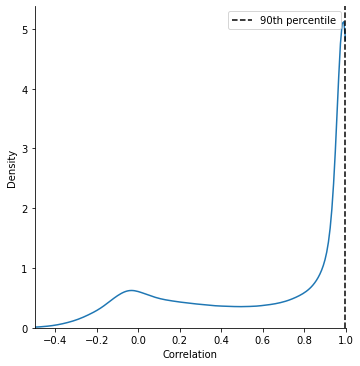

In [20]:
# We prepare the plot  
#fig, ax = plt.subplots()

g = sns.displot(corr_atm, kind='kde', cut=0)
plt.axvline(prc90_atm, color='k', linestyle='--', label = '90th percentile')
g.set( xlim= (-0.5, 1), xlabel = 'Correlation')
plt.legend()
plt.show()

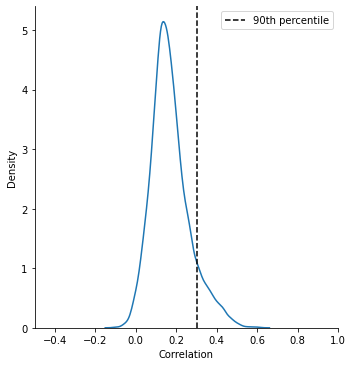

In [21]:
g = sns.displot(corr_surf, kind='kde')
plt.axvline(prc90_surf, color='k', linestyle='--', label = '90th percentile')
g.set(xlim=(-0.5, 1), xlabel = 'Correlation')
plt.legend()
plt.show()

In [343]:
nreps = 1000
list_num_samples = np.arange(5, 250, 1)
nsamp = len(list_num_samples)
ntot = nreps* nsamp

In [344]:
sample_corrs = np.zeros(ntot)
sample_size = np.zeros(ntot)

In [345]:
true_corr = 0.3

In [346]:
ind = 0
for num in list_num_samples:
    for rep in range(nreps):
        sample_corrs[ind] = compute_sample_correlation(num, true_corr)
        sample_size[ind] = num
        ind = ind + 1

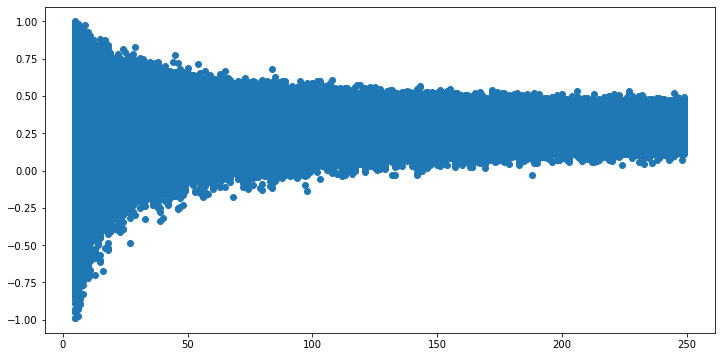

In [347]:
plt.scatter(sample_size, sample_corrs)
plt.show()

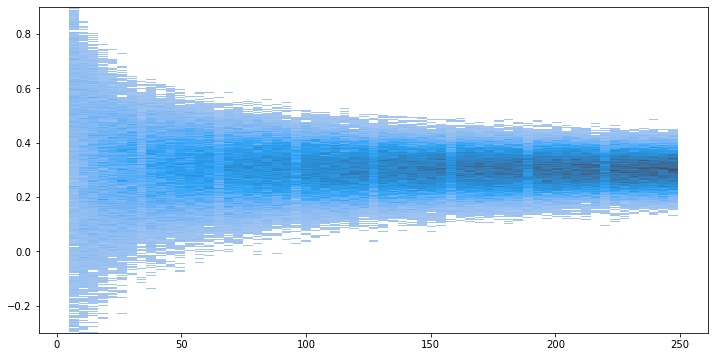

In [359]:
#sns.scatterplot(x=sample_size, y=sample_corrs, s=5, color="0.05")
sns.histplot(x=sample_size, y=sample_corrs, pthresh=0.01, stat="probability")
plt.ylim(-0.3, 0.9)
plt.show()